In [1]:
import requests
from urllib.parse import urlparse
from urllib.request import urlretrieve
from bs4 import BeautifulSoup

# URL de la página que contiene los enlaces
url = 'https://www.eso.org/sci/facilities/paranal/decommissioned/isaac/tools/lib.html'

# Hacer una solicitud a la página
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Buscar todos los enlaces que contienen archivos .fits
for link in soup.find_all('a', href=True):
    if link['href'].endswith('.fits'):
        file_url = link['href']
        file_name = file_url.split('/')[-1]

        # Verificar si es un enlace FTP o HTTP
        parsed_url = urlparse(file_url)

        if parsed_url.scheme == 'ftp':
            # Descargar archivos .fits desde FTP con urlretrieve
            print(f"Descargando {file_name} desde FTP...")
            urlretrieve(file_url, file_name)
        else:
            # Descargar archivos .fits desde HTTP con requests
            print(f"Descargando {file_name} desde HTTP...")
            file_response = requests.get(file_url)
            with open(file_name, 'wb') as f:
                f.write(file_response.content)
        print(f"{file_name} descargado.")



Descargando uko5v.fits desde FTP...
uko5v.fits descargado.
Descargando uko8iii.fits desde FTP...
uko8iii.fits descargado.
Descargando uko9v.fits desde FTP...
uko9v.fits descargado.
Descargando ukb0i.fits desde FTP...
ukb0i.fits descargado.
Descargando ukb0v.fits desde FTP...
ukb0v.fits descargado.
Descargando ukb12iii.fits desde FTP...
ukb12iii.fits descargado.
Descargando ukb1i.fits desde FTP...
ukb1i.fits descargado.
Descargando ukb1v.fits desde FTP...
ukb1v.fits descargado.
Descargando ukb2ii.fits desde FTP...
ukb2ii.fits descargado.
Descargando ukb2iv.fits desde FTP...
ukb2iv.fits descargado.
Descargando ukb3i.fits desde FTP...
ukb3i.fits descargado.
Descargando ukb3iii.fits desde FTP...
ukb3iii.fits descargado.
Descargando ukb3v.fits desde FTP...
ukb3v.fits descargado.
Descargando ukb57v.fits desde FTP...
ukb57v.fits descargado.
Descargando ukb5i.fits desde FTP...
ukb5i.fits descargado.
Descargando ukb5ii.fits desde FTP...
ukb5ii.fits descargado.
Descargando ukb5iii.fits desde FTP

In [24]:
import astropy.io.fits as F

cubo = F.open("/content/uko5v.fits")

cubo[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 4771 / Axis length                                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
EXTEND  =                    F / File may contain extensions                    
DATE    = '2000-02-16T18:17:18' / Date FITS file was generated                  
IRAF-TLM= '15:17:17 (16/02/2000)' / Time of last modification                   
APNUM1  = '1 1     '                                                            
WCSDIM  =                    1                                                  
CTYPE1  = 'LINEAR  '                                                            
CRVAL1  =                1150.                                                  
CRPIX1  =                   

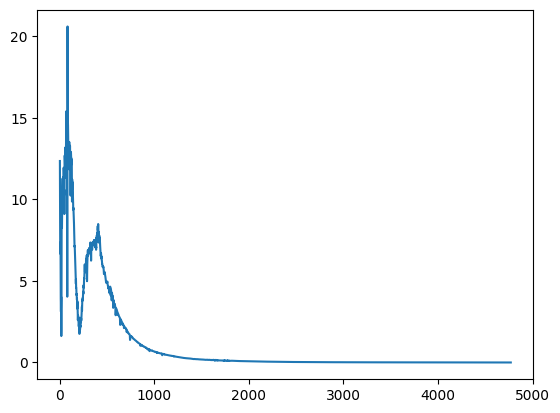

In [29]:
A = cubo[0].data
plt.plot(A)

In [4]:
from urllib.request import urlretrieve

# URL del archivo que deseas descargar
file_url = 'ftp://ftp.eso.org/web/sci/facilities/paranal/instruments/isaac/tools/lib/uko5v.dat.gz'

# Nombre del archivo que será guardado localmente
file_name = file_url.split('/')[-1]

# Descargar el archivo
print(f"Descargando {file_name}...")
urlretrieve(file_url, file_name)
print(f"{file_name} descargado.")

Descargando uko5v.dat.gz...
uko5v.dat.gz descargado.


In [32]:
from astropy.table import Table

def reader(PATH, ft='ascii'):
    '''
    Inputs:
    - PATH: Path del espectro
    - ft: formato del espectro
    '''
    tab = Table.read(PATH, format=ft)
    df_spectra = tab.to_pandas()
    # df_spectra = df_spectra[df_spectra['col1']<10050]
    # df_spectra = df_spectra[df_spectra['col1']>1950]

    if ft == 'ascii':
        np_sp = df_spectra.to_numpy()

    return np_sp

In [33]:
path_spectra = '/content/uko5v.dat.gz'
spectra = reader(path_spectra)
spectra.shape


(4771, 6)

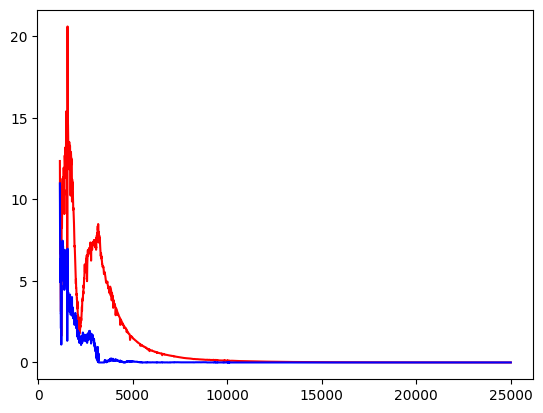

In [40]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(spectra[:,0], spectra[:,1], color= "red")

plt.plot(spectra[:,0], spectra[:,2], color = "blue")









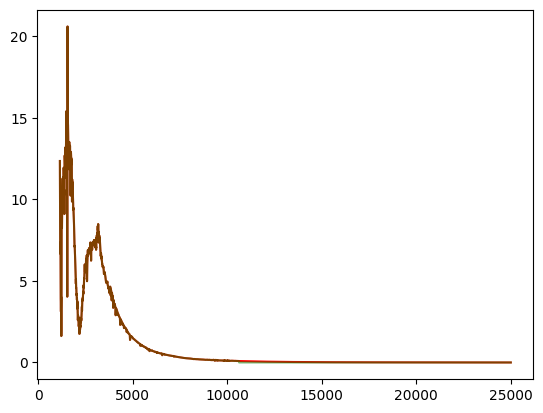

In [48]:
plt.plot(spectra[:,0], spectra[:,1], color= "red")
plt.plot(spectra[:,0], spectra[:,3],color = "green", alpha = 0.5)

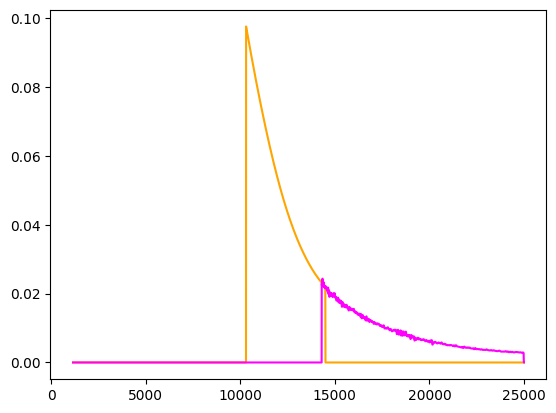

In [44]:
#plt.plot(spectra[:,0], spectra[:,3],color = "green")

plt.plot(spectra[:,0], spectra[:,4], color = "orange")

plt.plot(spectra[:,0], spectra[:,5], color = "magenta")